In [17]:
values_list=['Self-direction','Stimulation','Hedonism','Achievement','Power','Security','Conformity','Tradition','Benevolence','Universalism']

In [14]:
import pandas as pd
from statsmodels.stats import inter_rater as irr
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

all_grouped = []
summary_table = []

# open 10 files in a loop
for value in values_list:
    
    res_folder='../data/annotations/gpt-and-experts/data-by-values/'
    df=pd.read_csv(res_folder+value+'.csv', sep="|", encoding ='utf-8')
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    
   # how many labels are equal to 1
    df['expert_agreement_level'] = df[['expert1', 'expert2', 'expert3']].sum(axis=1)
    df['gpt_agreement_level'] = df['gpt_all_labels'].apply(lambda x: sum(map(int, x.split(','))))
    # if gpt is right
    df['gpt_if_correct'] = (df['experts_majority'] == df['gpt_majority']).astype(int)
    # =================================================================     
    df_combined_list.append(df)
   
    #=== ChatGPT!!  Interrater agreement calculation:  =============================
    print ('==== ' + value + ' =====')
    
    # convert 'gpt_all_labels' to array
    gpt_labels_array = df['gpt_all_labels'].apply(lambda x: list(map(int, x.split(',')))).tolist()
    gpt_labels_array = np.array(gpt_labels_array)

    dats, cats = irr.aggregate_raters(gpt_labels_array)
    # Fleiss' kappa
    fleiss_gpt = irr.fleiss_kappa(dats, method='fleiss')

    print(f"Fleiss' kappa (GPT): {fleiss_gpt:.3f}")

    #=== Experts!!  Interrater agreement calculation:  =============================
    dats, cats = irr.aggregate_raters(df[['expert1', 'expert2', 'expert3']].values)
    fleiss_experts=irr.fleiss_kappa(dats, method='fleiss')
    print ('Fleiss kappa between 3 experts: ', round(fleiss_experts,3))
    print ('')
    #  ==================================================================
    print ('====')
    # === Accuracy and confusion matrix calculation  ===  accuracy_score(y_true, y_pred) ==  confusion_matrix(y_true, y_pred)

    acc_gpt=accuracy_score(df.experts_majority.to_list(), df.gpt_majority.to_list())
    acc_gpt_unanimously=accuracy_score(df.experts_majority.to_list(), df.label_gpt_1_unanimously.to_list())
    acc_gpt_almost_unanimously=accuracy_score(df.experts_majority.to_list(), df.label_gpt_1_almost_unanimously.to_list())
    acc_gpt_any_ex_almost_unanimously=accuracy_score(df.expert_any.to_list(), df.label_gpt_1_almost_unanimously.to_list())


    print ("Accuracy between majority expert opinion and ChatGPT: " , round(acc_gpt,3))
    print ("Accuracy between majority expert opinion and ChatGPT_1_unanimously: " , round(acc_gpt_unanimously,3))
    print ("Accuracy between majority expert opinion and ChatGPT_1_almost_unanimously: " , round(acc_gpt_almost_unanimously,3))
    print ('')
    
    
    # === Aggregated table ===
    
    summary_table.append({
        'Value': value,
        "Fleiss' Kappa (GPT)": round(fleiss_gpt,3),
        "Fleiss' Kappa (Experts)": round(fleiss_experts,3),
        "GPT–Majority Match": round(acc_gpt, 3),
        "GPT–Unanimous Match": round(acc_gpt_unanimously, 3),
        "GPT–Almost-Unanimous Match": round(acc_gpt_almost_unanimously,3)
    })
 
    
    # how GPT accuracy is related to the level of expert agreement
    grouped = df.groupby('expert_agreement_level').agg({
        'gpt_agreement_level': 'mean',
        'gpt_if_correct': 'mean',
        'gpt_all_labels': 'count'
    }).rename(columns={
        'gpt_agreement_level': 'avg_gpt_agreement',
        'gpt_if_correct': 'gpt_accuracy',
        'gpt_all_labels': 'n_samples'
    })
    grouped['value'] = value
    grouped['expert_agreement_level'] = grouped.index
    all_grouped.append(grouped)
   
   

==== Self-direction =====
Fleiss' kappa (GPT): 0.569
Fleiss kappa between 3 experts:  0.468

====
Accuracy between majority expert opinion and ChatGPT:  0.411
Accuracy between majority expert opinion and ChatGPT_1_unanimously:  0.708
Accuracy between majority expert opinion and ChatGPT_1_almost_unanimously:  0.579

==== Stimulation =====
Fleiss' kappa (GPT): 0.600
Fleiss kappa between 3 experts:  0.215

====
Accuracy between majority expert opinion and ChatGPT:  0.65
Accuracy between majority expert opinion and ChatGPT_1_unanimously:  0.84
Accuracy between majority expert opinion and ChatGPT_1_almost_unanimously:  0.765

==== Hedonism =====
Fleiss' kappa (GPT): 0.658
Fleiss kappa between 3 experts:  0.534

====
Accuracy between majority expert opinion and ChatGPT:  0.845
Accuracy between majority expert opinion and ChatGPT_1_unanimously:  0.865
Accuracy between majority expert opinion and ChatGPT_1_almost_unanimously:  0.86

==== Achievement =====
Fleiss' kappa (GPT): 0.700
Fleiss kapp

In [113]:
results_df = pd.DataFrame(summary_table)
# save to CSV
# results_df.to_csv("", index=False)
results_df

,Value,Fleiss' Kappa (GPT),Fleiss' Kappa (Experts),GPT–Majority Match,GPT–Unanimous Match,GPT–Almost-Unanimous Match
0,Self-direction,0.569,0.468,0.495,0.762,0.663
1,Stimulation,0.600,0.215,0.680,0.840,0.795
2,Hedonism,0.658,0.534,0.860,0.880,0.885
3,Achievement,0.700,0.352,0.846,0.876,0.891
4,Power,0.757,0.231,0.786,0.846,0.821
5,Security,0.604,0.342,0.850,0.890,0.875
6,Conformity,0.502,0.093,0.881,0.891,0.920
7,Tradition,0.735,0.373,0.886,0.900,0.930
8,Benevolence,0.719,0.234,0.751,0.839,0.779
9,Universalism,0.649,0.163,0.743,0.874,0.822


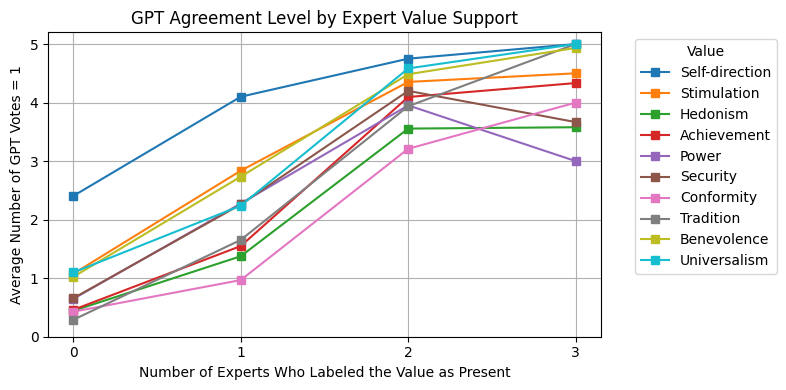

In [18]:
import matplotlib.pyplot as plt

# === Plot graphs ===
summary_df = pd.concat(all_grouped)

# GPT Agreement Level by Expert Value Support
plt.figure(figsize=(8, 4))
for value in summary_df['value'].unique():
    data = summary_df[summary_df['value'] == value]
    plt.plot(data['expert_agreement_level'], data['avg_gpt_agreement'], marker='s', label=value)
plt.title("GPT Agreement Level by Expert Value Support")
plt.xlabel("Number of Experts Who Labeled the Value as Present")
plt.ylabel("Average Number of GPT Votes = 1")
plt.ylim(0, 5.2)
plt.grid(True)
plt.legend(title="Value", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks([0, 1, 2, 3])
# plt.savefig("", dpi=300)
plt.show()
